## CPU PERFORMANCE PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures , OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression , LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#importing dataset
df = pd.read_csv(r"C:\Users\sumit\Desktop\ML\Data\computer+hardware\machine.data")
df

,adviser,32/60,125,256,6000,256.1,16,128,198,199
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290
...,...,...,...,...,...,...,...,...,...,...
203,sperry,80/8,124,1000,8000,0,1,8,42,37
204,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
205,sratus,32,125,2000,8000,0,2,14,52,41
206,wang,vs-100,480,512,8000,32,0,0,67,47


## About Dataset:
Relative CPU Performance Data, described in terms of its cycle time, memory size, etc

### Observation:
column names have been replaced by 1st row of data

In [3]:
df = df.shift(1)
df.loc[0] = df.columns
original_columns = ['VendorName' , 'ModelName' , 'MYCT' , 'MMIN' , 'MMAX' ,'CACH', 'CHMIN' ,'CHMAX' ,'PRP' ,'ERP']
df.columns = original_columns
df.head()

,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256.1,16,128,198,199
1,amdahl,470v/7,29.0,8000.0,32000.0,32.0,8.0,32.0,269.0,253.0
2,amdahl,470v/7a,29.0,8000.0,32000.0,32.0,8.0,32.0,220.0,253.0
3,amdahl,470v/7b,29.0,8000.0,32000.0,32.0,8.0,32.0,172.0,253.0
4,amdahl,470v/7c,29.0,8000.0,16000.0,32.0,8.0,16.0,132.0,132.0


In [4]:
#getting new columnns
df.columns

Index(['VendorName', 'ModelName', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN',
       'CHMAX', 'PRP', 'ERP'],
      dtype='object')

In [5]:
df.shape

(208, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  208 non-null    object
 1   ModelName   208 non-null    object
 2   MYCT        208 non-null    object
 3   MMIN        208 non-null    object
 4   MMAX        208 non-null    object
 5   CACH        208 non-null    object
 6   CHMIN       208 non-null    object
 7   CHMAX       208 non-null    object
 8   PRP         208 non-null    object
 9   ERP         208 non-null    object
dtypes: object(10)
memory usage: 16.4+ KB


In [7]:
for col in df.columns[2:]:
    df[col] = df[col].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   VendorName  208 non-null    object 
 1   ModelName   208 non-null    object 
 2   MYCT        208 non-null    float64
 3   MMIN        208 non-null    float64
 4   MMAX        208 non-null    float64
 5   CACH        208 non-null    float64
 6   CHMIN       208 non-null    float64
 7   CHMAX       208 non-null    float64
 8   PRP         208 non-null    float64
 9   ERP         208 non-null    float64
dtypes: float64(8), object(2)
memory usage: 16.4+ KB


## Observation
Many integer columns were being identified as object type; converted them to float64

## Understanding features
1. **VendorName** : Categorical
2. **ModelName:** Categorical
3. **MYCT:** machine cycle time
4. **MMIN:** minimum main memory
5. **MMAX:** maximum main memory
6. **CACH:** cache memory
7. **CHMIN:** minimum channels
8. **CHMAX:** maximum channels	
9. **PRP:** published relative performance
10. **ERP:** estimated relative performance from the original article

ERP is the column of values predicted earlier. We need to predict the values using our own model. So, we drop the column ERP.
PRP is the publihed relative performance which will be our target variable.

**Target Variable:**  PRP

In [8]:
df = df.drop('ERP', axis = 1)
df.head()

,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,adviser,32/60,125.0,256.0,6000.0,256.1,16.0,128.0,198.0
1,amdahl,470v/7,29.0,8000.0,32000.0,32.0,8.0,32.0,269.0
2,amdahl,470v/7a,29.0,8000.0,32000.0,32.0,8.0,32.0,220.0
3,amdahl,470v/7b,29.0,8000.0,32000.0,32.0,8.0,32.0,172.0
4,amdahl,470v/7c,29.0,8000.0,16000.0,32.0,8.0,16.0,132.0


In [9]:
## checking for null values
df.isnull().sum()

VendorName    0
ModelName     0
MYCT          0
MMIN          0
MMAX          0
CACH          0
CHMIN         0
CHMAX         0
PRP           0
dtype: int64

In [10]:
#Checking for duplicate rows
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
203    False
204    False
205    False
206    False
207    False
Length: 208, dtype: bool

In [11]:
# Getting the correlation matrix
# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64'])

# Compute correlation matrix
numeric_columns.corr()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
MYCT,1.000000,-0.334271,-0.376579,-0.318966,-0.298712,-0.247870,-0.306106
MMIN,-0.334271,1.000000,0.757844,0.534038,0.516468,0.265738,0.794772
MMAX,-0.376579,0.757844,1.000000,0.537028,0.559539,0.526179,0.863011
CACH,-0.318966,0.534038,0.537028,1.000000,0.581368,0.486790,0.662317
CHMIN,-0.298712,0.516468,0.559539,0.581368,1.000000,0.547222,0.608556
CHMAX,-0.247870,0.265738,0.526179,0.486790,0.547222,1.000000,0.604859
PRP,-0.306106,0.794772,0.863011,0.662317,0.608556,0.604859,1.000000


## Observation:
1. There are no null values
2. There are no duplicate rows in a dataset
3. The correlation matrix shows that all features are contributing to the target variable.

In [12]:
df.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,202.495192,2876.961538,11833.634615,25.327404,4.721154,18.355769,105.913462
std,260.180279,3885.921643,11742.299090,40.691600,6.824872,26.028939,161.163410
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.500000,8.000000,50.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.250000
max,1500.000000,32000.000000,64000.000000,256.100000,52.000000,176.000000,1150.000000


In [13]:
df.nunique()

VendorName     30
ModelName     208
MYCT           60
MMIN           25
MMAX           23
CACH           23
CHMIN          15
CHMAX          31
PRP           116
dtype: int64

In [14]:
df = df.drop('VendorName',  axis =1)
df = df.drop('ModelName' , axis =1)
df.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,125.0,256.0,6000.0,256.1,16.0,128.0,198.0
1,29.0,8000.0,32000.0,32.0,8.0,32.0,269.0
2,29.0,8000.0,32000.0,32.0,8.0,32.0,220.0
3,29.0,8000.0,32000.0,32.0,8.0,32.0,172.0
4,29.0,8000.0,16000.0,32.0,8.0,16.0,132.0


In [15]:
df.shape

(208, 7)

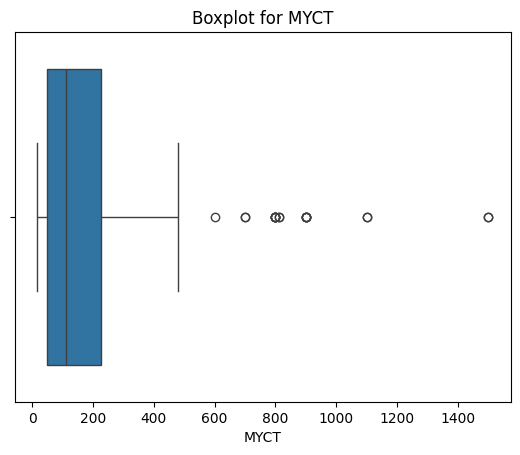

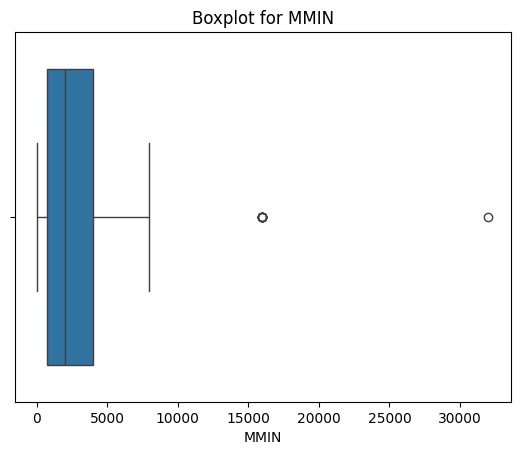

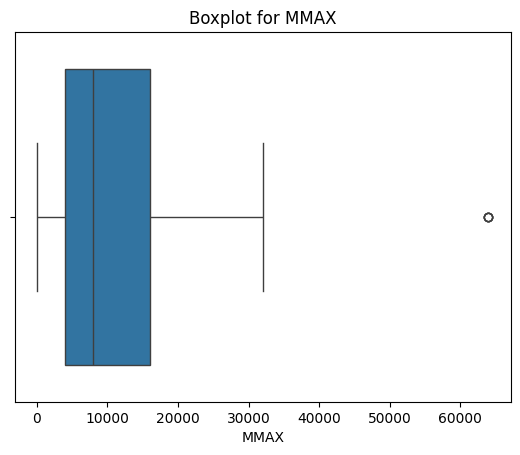

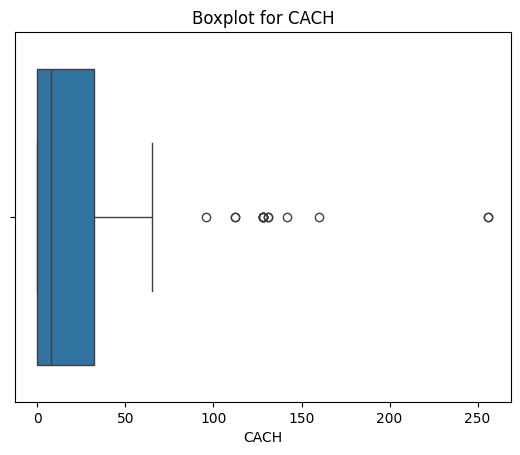

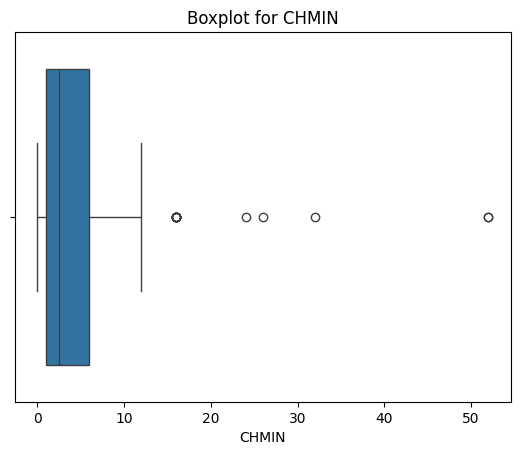

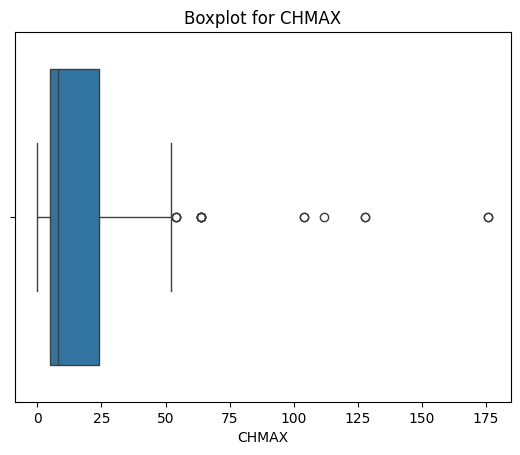

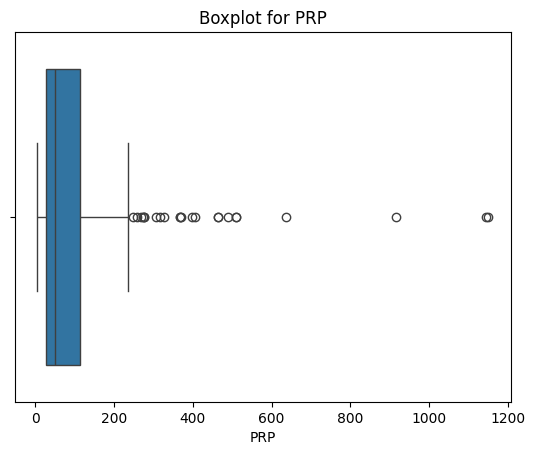

In [16]:
# Checking for outliers
def plot_boxplots(dataframe, columns):
    if columns is None:
        columns = dataframe.columns
    for column in columns:
        sns.boxplot(x=dataframe[column])
        plt.title(f'Boxplot for {column}')
        plt.xlabel(column)
        plt.show()

plot_boxplots(df, None)

## Observation:
1. VendorName and ModelName were having 30 and 208 unique values respectively, which were too much to be categorized and hence these columns were dropped.
2. Checked for and removed the existing outliers in MYCT and CACH columns respectively.

## ML :

In [17]:
#Separating features and target variables:
X = df.drop('PRP', axis=1)
y = df['PRP']

# Define preprocessing for numerical features
numerical_features = ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']
numerical_transformer = StandardScaler()

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train_preprocessed, y_train)

# Predict on the test data
y_pred = model.predict(X_test_preprocessed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 4254.491803617444
R^2 Score: 0.8913731444092434


In [18]:
# Calculate the baseline (mean) prediction
baseline_pred = [y_train.mean()] * len(y_test)

# Calculate baseline performance metrics
baseline_mse = mean_squared_error(y_test, baseline_pred)
baseline_r2 = r2_score(y_test, baseline_pred)

print(f"Baseline Mean Squared Error: {baseline_mse}")
print(f"Baseline R^2 Score: {baseline_r2}")


Baseline Mean Squared Error: 40240.396368606955
Baseline R^2 Score: -0.02742887447351694


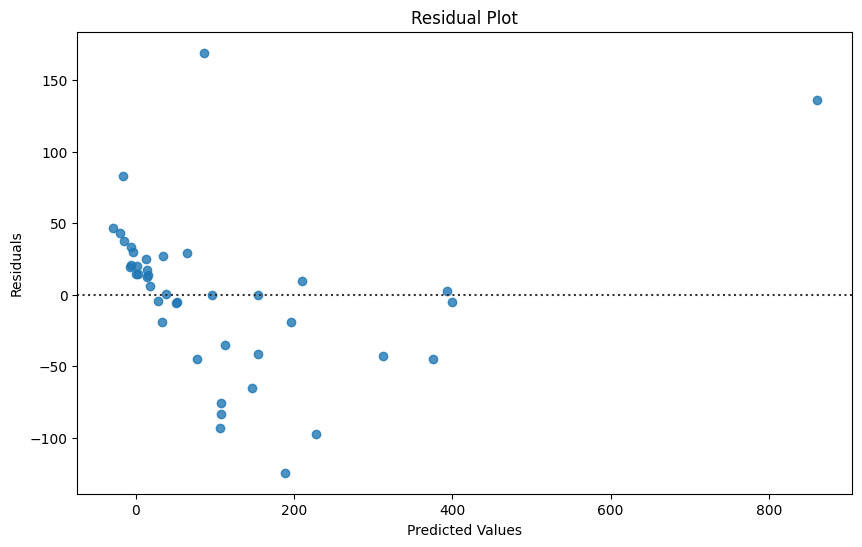

In [19]:
import statsmodels.api as sm

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

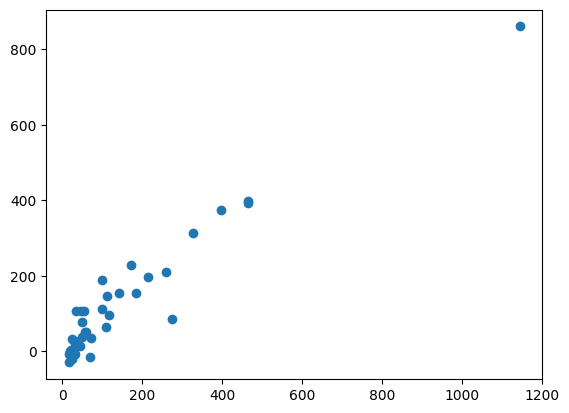

In [20]:
plt.scatter(y_test,y_pred)


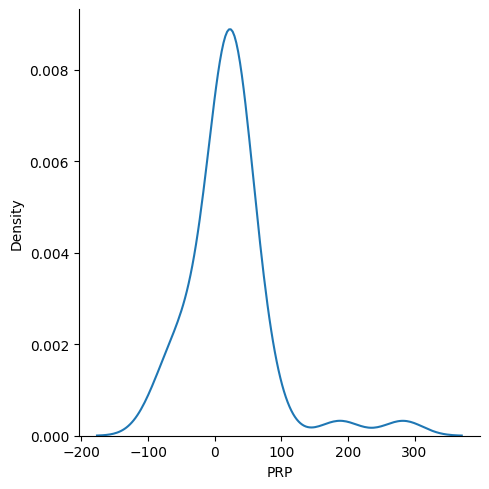

In [22]:
sns.displot(residuals, kind = "kde")